In [1]:
################################################################################
# IMPORTS
################################################################################
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42


# Specify each path

In [2]:
################################################################################
# PATHS
################################################################################
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'


# Set number of classes

In [3]:
NUM_CLASSES = 25

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED
)

# Model building

In [7]:
################################################################################
# MODEL BUILDING
################################################################################

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(42,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 25)                825       
                                                                 
Total params: 16665 (65.10 KB)
Trainable params: 16665 (

In [9]:
################################################################################
# CALLBACKS
################################################################################
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path,
    verbose=1,
    save_weights_only=False
)

es_callback = tf.keras.callbacks.EarlyStopping(
    patience=20,
    verbose=1,
    restore_best_weights=True
)


In [10]:
################################################################################
# MODEL COMPILATION
################################################################################
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Model training

In [11]:
################################################################################
# MODEL TRAINING
################################################################################
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/1000
 1/41 [..............................] - ETA: 6s - loss: 3.1901 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 [==============================] - 0s 2ms/step - loss: 3.0758 - accuracy: 0.1061 - val_loss: 2.8135 - val_accuracy: 0.1340
Epoch 2/1000
 1/41 [..............................] - ETA: 0s - loss: 2.9197 - accuracy: 0.1328
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 [==============================] - 0s 946us/step - loss: 2.5741 - accuracy: 0.2231 - val_loss: 2.1110 - val_accuracy: 0.4077
Epoch 3/1000
 1/41 [..............................] - ETA: 0s - loss: 2.2322 - accuracy: 0.3672
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 [==============================] - 0s 898us/step - loss: 1.9837 - accuracy: 0.3696 - val_loss: 1.5074 - val_accuracy: 0.5865
Epoch 4/1000
 1/41 [..............................] - ETA: 0s - loss: 1.6961 - accuracy: 0

In [12]:
################################################################################
# EVALUATION
################################################################################
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


14/14 [==============================] - 0s 697us/step - loss: 0.0039 - accuracy: 0.9988
Validation Loss: 0.003882530378177762
Validation Accuracy: 0.9988499283790588


In [13]:
################################################################################
# LOAD SAVED MODEL
################################################################################
model = tf.keras.models.load_model(model_save_path, compile=False)


In [14]:
################################################################################
# INFERENCE TEST
################################################################################
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print("Predicted Class:", np.argmax(np.squeeze(predict_result)))


1/1 [==============================] - 0s 27ms/step
[8.8971902e-10 1.7957163e-16 1.3823250e-28 2.6915438e-12 3.1438619e-22
 0.0000000e+00 4.6046628e-24 9.1514636e-08 6.2879479e-09 1.2061907e-14
 4.8500794e-09 3.4782466e-14 2.2402997e-33 9.0738008e-24 1.5460811e-15
 2.6857906e-06 9.9999726e-01 0.0000000e+00 1.8197525e-19 5.8014880e-16
 6.3118625e-12 9.1640323e-17 2.4784290e-29 4.3397164e-11 1.3804149e-13]
Predicted Class: 16


# Confusion matrix

55/55 [==============================] - 0s 234us/step


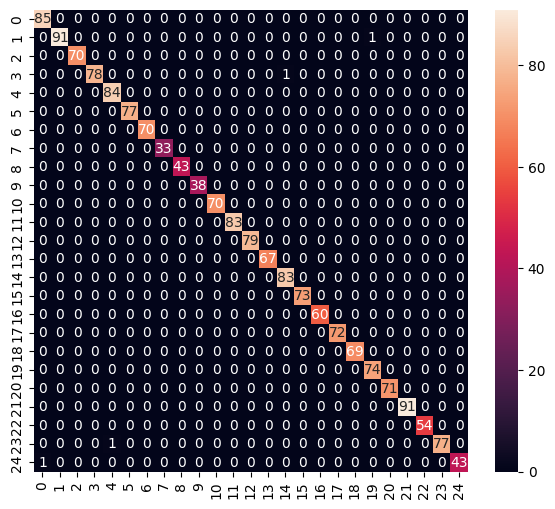

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.99      0.99        92
           2       1.00      1.00      1.00        70
           3       1.00      0.99      0.99        79
           4       0.99      1.00      0.99        84
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        38
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        83
          12       1.00      1.00      1.00        79
          13       1.00      1.00      1.00        67
          14       0.99      1.00      0.99        83
          15       1.00      1.00      1.00        73
          16       1.00      1.00      1.00        60
     

In [15]:
################################################################################
# CONFUSION MATRIX
################################################################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(labels), 0)
    plt.show()
    
    if report:
        print("Classification Report")
        print(classification_report(y_true, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


# Convert to model for Tensorflow-Lite

In [16]:
################################################################################
# SAVE INFERENCE MODEL
################################################################################
h5_save_path = 'keypoint_classifier.h5'

# Save the model for inference (without optimizer)
model.save(h5_save_path, include_optimizer=False)

# Load the model for inference
model = tf.keras.models.load_model(h5_save_path, compile=False)


/Users/mohamedabdullrahma/Desktop/ECS 170 Group Final/ECS-170-Group-Project/mp_env/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
################################################################################
# TFLITE CONVERSION (QUANTIZED)
################################################################################
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = False 

tflite_quantized_model = converter.convert()

with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

print("Saved:", tflite_save_path)


INFO:tensorflow:Assets written to: /var/folders/n_/vp93498x3cn_0ykwxdwxmpjr0000gn/T/tmp3j2uezkp/assets


INFO:tensorflow:Assets written to: /var/folders/n_/vp93498x3cn_0ykwxdwxmpjr0000gn/T/tmp3j2uezkp/assets
2025-12-08 10:50:43.585855: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2025-12-08 10:50:43.585909: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2025-12-08 10:50:43.600783: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2025-12-08 10:50:43.600809: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


Saved: model/keypoint_classifier/keypoint_classifier.tflite


# Inference test

In [18]:
################################################################################
# LOAD TFLITE MODEL
################################################################################
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 90 μs, sys: 116 μs, total: 206 μs
Wall time: 107 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.26795180e-10 1.67367040e-16 6.40686536e-29 2.23236013e-12
 1.79580676e-22 0.00000000e+00 2.57969290e-24 8.49956905e-08
 4.95111818e-09 1.03894503e-14 4.38419745e-09 3.01993029e-14
 1.05377935e-33 6.29781424e-24 1.16916424e-15 2.71702447e-06
 9.99997139e-01 0.00000000e+00 1.23822553e-19 5.25456042e-16
 4.49395816e-12 5.07197241e-17 1.04290393e-29 4.29778851e-11
 1.28577785e-13]
16
